In [65]:
import pandas as pd

# Load the Excel file
excel_file = 'Assignment.xlsx'

# Load the individual sheets into separate DataFrames
user_details = pd.read_excel(excel_file, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(excel_file, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(excel_file, sheet_name='OrderDetails.csv')


In [66]:
# Check the first few rows of each DataFrame
print(user_details.head())
print(cooking_sessions.head())
print(order_details.head())

  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  
  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002     Caesar Salad      Lunch 2024-12-01 12:00:00 

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [68]:
# 1. Data Cleaning
## Check for missing values in each DataFrame
print(user_details.isnull().sum())
print(cooking_sessions.isnull().sum())
print(order_details.isnull().sum())



User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


In [103]:
print(user_details.info())
print(cooking_sessions.info())
print(order_details.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            10 non-null     object        
 1   User Name          10 non-null     object        
 2   Age                10 non-null     int64         
 3   Location           10 non-null     object        
 4   Registration Date  10 non-null     datetime64[ns]
 5   Phone              10 non-null     object        
 6   Email              10 non-null     object        
 7   Favorite Meal      10 non-null     object        
 8   Total Orders       10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 800.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Se

In [69]:
## Handle missing values (fill or drop)
# Fill missing ratings with the mean for 'Session Rating' in cooking_sessions
cooking_sessions['Session Rating'].fillna(cooking_sessions['Session Rating'].mean(), inplace=True)

In [70]:
# Drop rows with missing emails in user_details
user_details.dropna(subset=['Email'], inplace=True)

In [71]:
# Remove any duplicate rows
user_details.drop_duplicates(inplace=True)
cooking_sessions.drop_duplicates(inplace=True)
order_details.drop_duplicates(inplace=True)

In [82]:
# Select relevant columns from each dataset
# UserDetails: Only include User ID, Age, Email, Favorite Meal
user_details_filtered = user_details[['User ID', 'Age', 'Email', 'Favorite Meal']]
# CookingSessions: Only include User ID, Dish Name, Meal Type, Session Start, Session Rating
cooking_sessions_filtered = cooking_sessions[['User ID', 'Dish Name', 'Meal Type', 'Session Start', 'Session Rating']]
# OrderDetails: Only include User ID, Order Date, Meal Type, Dish Name, Amount, Rating
order_details_filtered = order_details[['User ID', 'Order Date', 'Meal Type', 'Dish Name', 'Amount (USD)', 'Rating']]

# Merge the datasets on 'User ID', ensuring only the important columns are included
merged_data = pd.merge(user_details_filtered, order_details_filtered, on='User ID', how='left')
merged_data = pd.merge(merged_data, cooking_sessions_filtered, on='User ID', how='left')

# Check the first few rows of the merged dataset
print(merged_data.head())

merged_data.columns

  User ID  Age            Email Favorite Meal Order Date Meal Type_x  \
0    U001   28  alice@email.com        Dinner 2024-12-01      Dinner   
1    U001   28  alice@email.com        Dinner 2024-12-01      Dinner   
2    U001   28  alice@email.com        Dinner 2024-12-01      Dinner   
3    U001   28  alice@email.com        Dinner 2024-12-02   Breakfast   
4    U001   28  alice@email.com        Dinner 2024-12-02   Breakfast   

  Dish Name_x  Amount (USD)  Rating      Dish Name_y Meal Type_y  \
0   Spaghetti          15.0     5.0        Spaghetti      Dinner   
1   Spaghetti          15.0     5.0         Pancakes   Breakfast   
2   Spaghetti          15.0     5.0  Grilled Chicken      Dinner   
3    Pancakes           8.0     4.0        Spaghetti      Dinner   
4    Pancakes           8.0     4.0         Pancakes   Breakfast   

        Session Start  Session Rating  
0 2024-12-01 19:00:00             4.5  
1 2024-12-02 07:30:00             4.2  
2 2024-12-05 19:00:00             4.9 

Index(['User ID', 'Age', 'Email', 'Favorite Meal', 'Order Date', 'Meal Type_x',
       'Dish Name_x', 'Amount (USD)', 'Rating', 'Dish Name_y', 'Meal Type_y',
       'Session Start', 'Session Rating'],
      dtype='object')

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
# Convert 'Order Date' and 'Session Start' to datetime
merged_data['Order Date'] = pd.to_datetime(merged_data['Order Date'])
merged_data['Session Start'] = pd.to_datetime(merged_data['Session Start'])



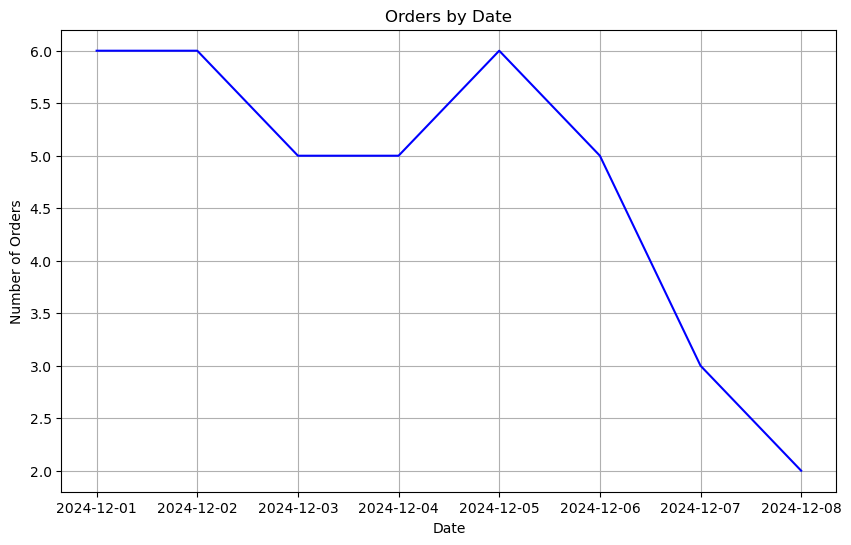

In [90]:
# Plot orders by date (Trend over time)
plt.figure(figsize=(10, 6))
orders_by_date = merged_data.groupby(merged_data['Order Date'].dt.date)['Order Date'].count()
orders_by_date.plot(kind='line', color='b')
plt.title('Orders by Date')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


In [99]:
#  Identify the Most Ordered Dishes
most_ordered_dishes = merged_data['Dish Name_x'].value_counts().head(10)
# Display the most ordered dishes
print("Most Ordered Dishes:")
print(most_ordered_dishes)

# Identify the Most Cooked Dishes (Top 10 Dishes)
most_cooked_dishes = merged_data['Dish Name_x'].value_counts().head(10)

# Display the most cooked dishes
print("\nMost Cooked Dishes:")
print(most_cooked_dishes)

Most Ordered Dishes:
Spaghetti          9
Grilled Chicken    9
Caesar Salad       7
Pancakes           6
Veggie Burger      4
Oatmeal            3
Name: Dish Name_x, dtype: int64

Most Cooked Dishes:
Spaghetti          9
Grilled Chicken    9
Caesar Salad       7
Pancakes           6
Veggie Burger      4
Oatmeal            3
Name: Dish Name_x, dtype: int64


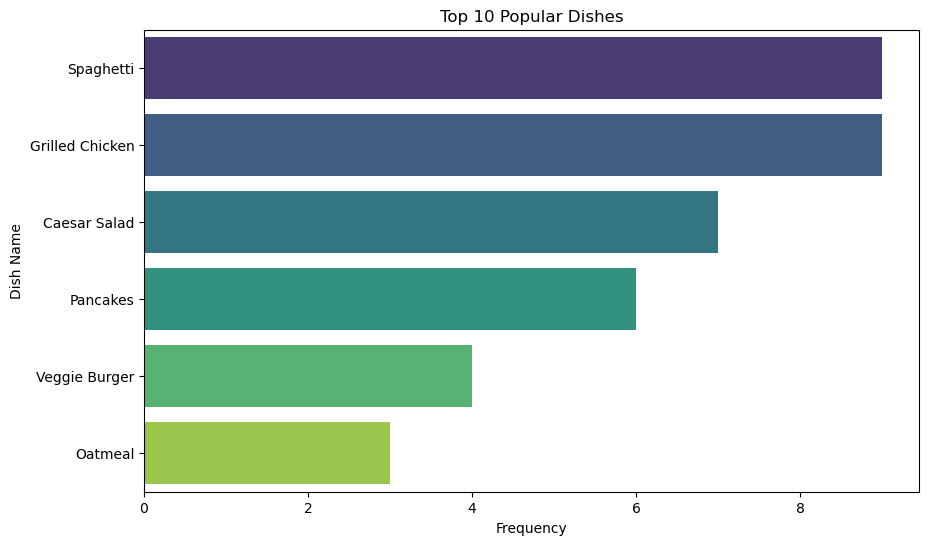

In [100]:
#Identify Popular Dishes (Top 10 Dishes)
popular_dishes = merged_data['Dish Name_x'].value_counts().head(10)

# Visualize top 10 popular dishes
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_dishes.values, y=popular_dishes.index, palette='viridis')
plt.title('Top 10 Popular Dishes')
plt.xlabel('Frequency')
plt.ylabel('Dish Name')
plt.show()

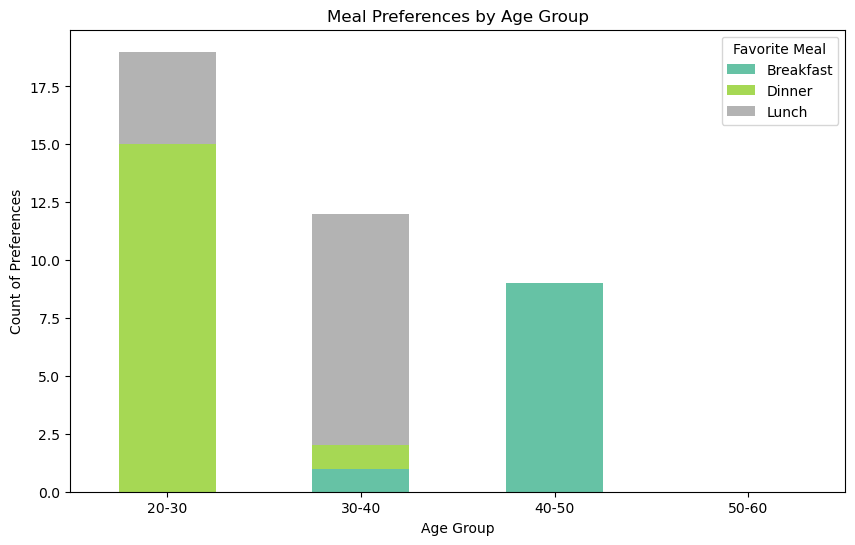

In [92]:
#  Demographic Analysis: Meal Preferences by Age Group

# Categorize users into age groups
merged_data['Age Group'] = pd.cut(merged_data['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])

# Meal preferences by age group
meal_preference_by_age = merged_data.groupby(['Age Group', 'Favorite Meal']).size().unstack().fillna(0)

# Plot meal preferences by age group
meal_preference_by_age.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Meal Preferences by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Preferences')
plt.xticks(rotation=0)
plt.show()



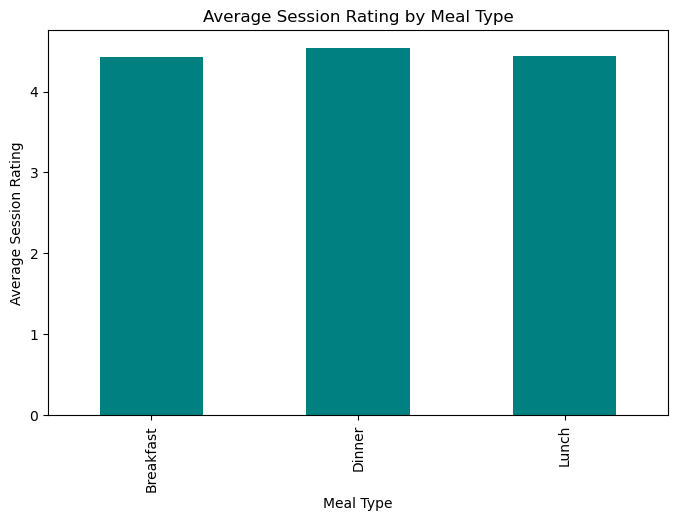

In [95]:
# Average Session Duration by Meal Type
avg_session_duration = merged_data.groupby('Meal Type_x')['Session Rating'].mean()

# Plot average session duration by meal type
plt.figure(figsize=(8, 5))
avg_session_duration.plot(kind='bar', color='teal')
plt.title('Average Session Rating by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Average Session Rating')
plt.show()



In [104]:
#Business Recommendations Based on the Analysis
recommendations = """
1. Dinner meals are the most popular, so consider expanding the dinner menu offerings.
2. Users in the 30-40 age group prefer lunch meals the most, so targeting this group with promotions for lunch could increase
    engagement.
3. The average session rating for breakfast meals is lower than other meal types. Consider improving the breakfast 
    experience or menu options.
4. Popular dishes like 'Spaghetti' and 'Caesar Salad' should be highlighted in marketing campaigns to drive more orders.
5. Encouraging users to leave ratings for their sessions could improve the quality of data and provide better insights.
"""

print(recommendations)





1. Dinner meals are the most popular, so consider expanding the dinner menu offerings.
2. Users in the 30-40 age group prefer lunch meals the most, so targeting this group with promotions for lunch could increase
    engagement.
3. The average session rating for breakfast meals is lower than other meal types. Consider improving the breakfast 
    experience or menu options.
4. Popular dishes like 'Spaghetti' and 'Caesar Salad' should be highlighted in marketing campaigns to drive more orders.
5. Encouraging users to leave ratings for their sessions could improve the quality of data and provide better insights.



In [106]:
#Save the merged data to a CSV (Optional)
merged_data.to_csv('Merged_UserData.csv', index=False)


# Business Objective:
The objective of this analysis is to optimize the user experience and operational efficiency of a food delivery service by gaining insights into user behavior, cooking preferences, and order trends. Through data analysis, we aim to enhance user engagement, boost order frequency, and drive higher ratings for cooking sessions, ultimately leading to increased revenue and customer satisfaction.


# Maximize:

- Order Frequency: Increasing the number of orders placed by users, particularly during high-demand times like dinner hours.
- Customer Satisfaction: Maximize user ratings for cooking sessions, particularly for popular dishes, to maintain a positive brand reputation.
- Meal Preferences Alignment: Ensure that the most popular meals (such as Spaghetti, Caesar Salad, etc.) are always available and promoted, maximizing their sales.
- User Engagement: Increase user interaction by targeting specific age groups with promotions for meals they prefer, enhancing user retention and loyalty.

# Minimize:

- Order Cancellations: Reduce the number of canceled orders by addressing potential issues, such as long delivery times or unavailable menu items.
- Negative Feedback: Minimize the occurrence of low session ratings (e.g., sessions with a rating below 3) by improving the quality of meals and the user experience.
- Session Duration Inefficiency: Minimize long, unproductive cooking sessions, especially for breakfast meals where ratings are lower, by optimizing cooking processes and menus.